Credit is due where credit is due: this follows the mathematical introduction presented in "The Illustrated Wavelet Transform Handbook" by Paul S. Addison.

Cover the imports. Use `numpy` for most of the maths and `matplotlib` for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

The Mexican Hat wavelet is the 2nd dertivative of the Gaussian distribution functio. (Here I will consider it without the normalising factor.)

$$ G(t) = e^{-\frac{t^{2}}{2}} $$

The first derivative:

$$ \frac{dG}{dt} = -te^{-\frac{t^{2}}{2}}$$

2nd:

$$ \frac{d^{2}G}{dt^{2}} = -(1-t^{2})e^{-\frac{t^{2}}{2}}$$

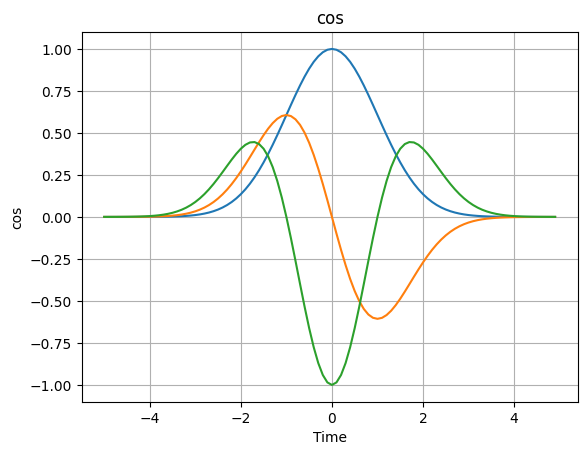

In [2]:
dt = 0.1
ti = np.arange(-5,5,dt)
gauss = np.exp(-0.5*(ti**2))
gauss_d = -gauss * ti
gauss_d2 = -(1 - (ti**2)) * gauss
plt.plot(ti, gauss)
plt.plot(ti, gauss_d)
plt.plot(ti, gauss_d2)
plt.title('cos')
plt.xlabel('Time')
plt.ylabel('cos')
plt.grid(True, which='both')

The Mexican Hat wavelet I will consider will be the negative of the second derivative.

$$ MH = -\frac{d^{2}G}{dt^{2}} = (1-t^{2})e^{-\frac{t^{2}}{2}}$$

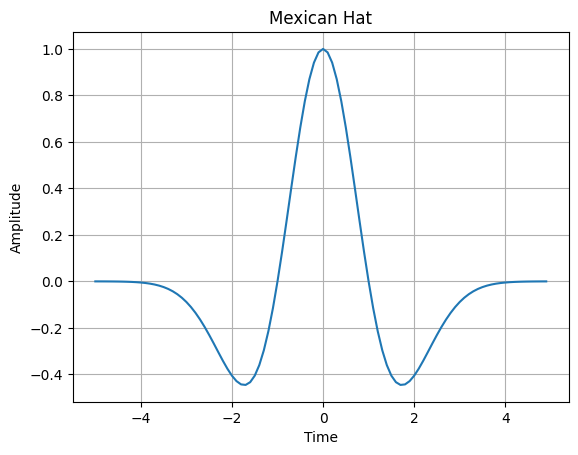

In [3]:
mh = -gauss_d2
plt.plot(ti, mh)
plt.title('Mexican Hat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.show()

Compute the energy spectrum as the square of the Fourier trasform.

$$ E_{F}(f) = |\psi(f)|^{2} = 32\pi^{5}f^{4}e^{-4\pi^{2}f^{2}}$$

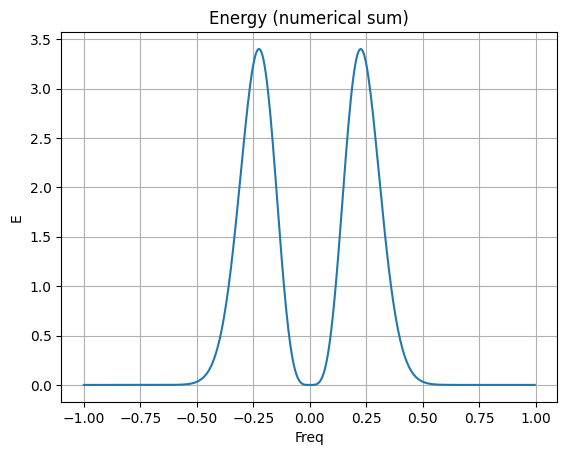

In [28]:
df = 0.005
fi = np.arange(-1.0,1.0,df)
eng = []
for i in range(0,len(fi)):
    e = np.sum(mh*np.exp(-2j*np.pi*fi[i]*ti))*dt
    eng.append(e.real**2)

eng_form = 32 * (np.pi**5) * (fi**4) * np.exp(-4*(np.pi**2)*(fi**2))
plt.plot(fi, eng)
plt.title('Energy (numerical sum)')
plt.xlabel('Freq')
plt.ylabel('E')
plt.grid(True, which='both')
plt.show()


Total energy as integral over the square of the wavelet.

$$ E = \int_{-\infty}^{+\infty} |\phi(t)|^{2} dt $$

In the case of the Mexican Hat wavelet:

$$ E^{MH} = \frac{3}{4}\sqrt{\pi}$$

In [30]:
E = np.sum(mh**2)*dt
E_exp = 3/4*np.sqrt(np.pi)
print(E)
print(E_exp)


1.3293403863551638
1.329340388179137


Cg=3.1415845694132587
Pi=3.141592653589793


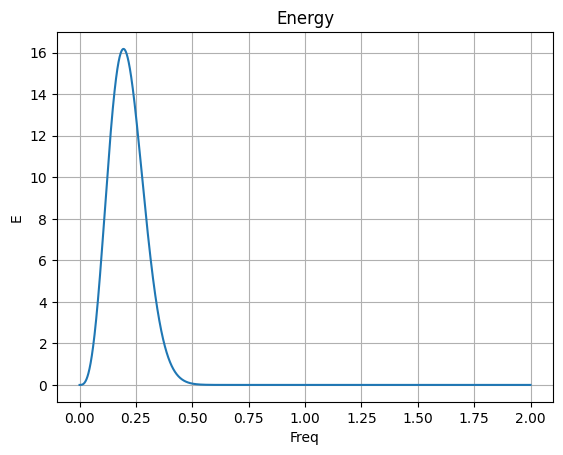

In [24]:
dfp = 0.0001
fi_p = np.arange(dfp,2.0,dfp)
cg_arr = []
for i in range(0,len(fi_p)):
    e = np.sum(mh*np.exp(-2j*np.pi*fi_p[i]*ti))*dt
    cg_arr.append((e.real**2)/fi_p[i])
    
cg = np.sum(cg_arr) * dfp
print("Cg={0}".format(cg))
print("Pi={0}".format(np.pi))
plt.plot(fi_p, cg_arr)
plt.title('Energy')
plt.xlabel('Freq')
plt.ylabel('E')
plt.grid(True, which='both')


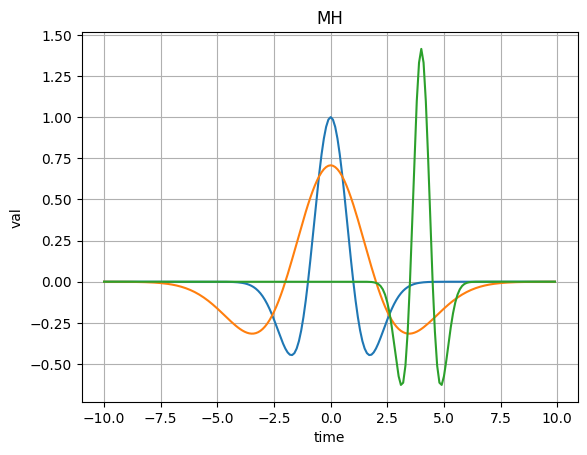

In [117]:
#dt = 0.05
ti2 = np.arange(-10,10,dt)
def MH(t_inp, a, b):
    t = ((t_inp - b)/a)
    wa = 1/(np.sqrt(a))
    return np.conj((wa*(1 - (t**2)) * np.exp(-0.5*(t**2))))

plt.plot(ti2, MH(ti2, 1, 0))
plt.plot(ti2, MH(ti2, 2, 0))
plt.plot(ti2, MH(ti2, 0.5, 4))
plt.title('MH')
plt.xlabel('time')
plt.ylabel('val')
plt.grid(True, which='both')
plt.show()

CWT definition:

$$ T(a,b) = \frac{1}{\sqrt{a}}\int_{-\infty}^{\infty}x(t)\psi^{*}(\frac{t-b}{a})dt$$

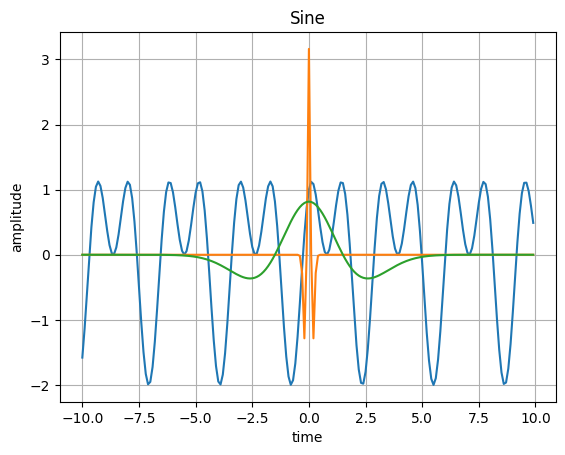

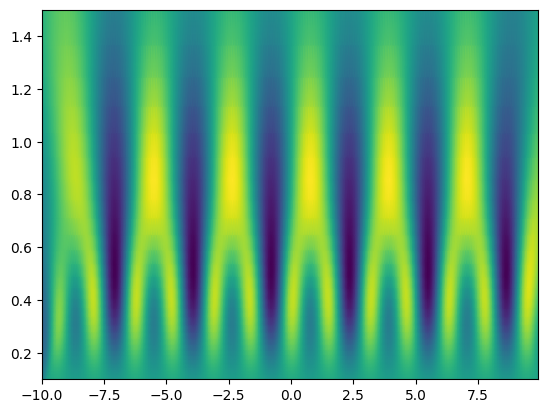

In [120]:
dts = 0.1
ts = np.arange(-10, 10, dts)
sig = np.sin(ts*2) + np.cos(ts*4)
fs = np.logspace(np.log10(0.1), np.log10(1.5), num=30)

cwt = np.zeros([len(fs), len(ts)])

for i in range(0, len(ts)):
    for j in range(0,len(fs)):
        cwt[j][i] = sum(sig * MH(ts, fs[j], ts[i]))*dts

plt.plot(ts, sig)
plt.plot(ts, MH(ts, fs[0], 0))
plt.plot(ts, MH(ts, fs[-1], 0))
plt.title('Sine')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True, which='both')
plt.show()
        
plt.pcolormesh(ts, fs, cwt, cmap='viridis', shading='gouraud')
plt.show()


Iverse CWT definition:

$$ x(t) = \frac{1}{C_{g}}\int_{-\infty}^{\infty}\int_{0}^{\infty}T(a,b)\psi_{a,b}(t)\frac{dadb}{a^{2}} $$

Note: the implemetation mimics the formula above and is not very efficient.

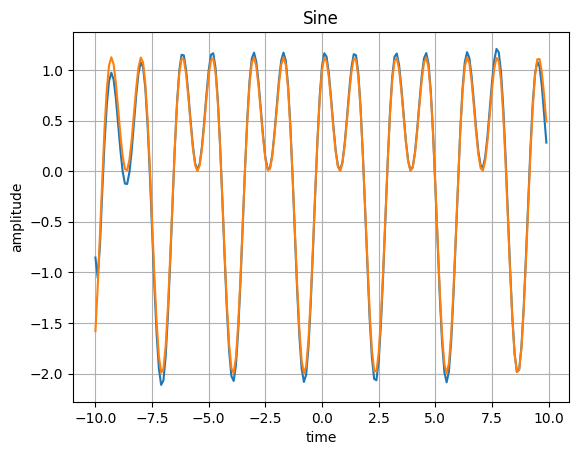

In [121]:
cwt.shape
fsc = 1/(fs**2)

new_sig = np.zeros(len(sig))

for i in range(0,len(ts)):
    for j in range(0,len(ts)):
        for k in range(0, len(fs)):
            if k != len(fs)-1:
                dfs = fs[k+1] - fs[k]
            else:
                dfs = fs[k] - fs[k-1]
            new_sig[i] += cwt[k][j]*MH(ts,fs[k],ts[j])[i]/(fs[k]**2)*dfs*dts


plt.plot(ts, new_sig/cg)
plt.plot(ts, sig)
plt.title('Sine')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True, which='both')
plt.show()